<a href="https://colab.research.google.com/github/Leonanda1013/Pembelajaran_Mesin/blob/main/Pertemuan_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

## Praktikum 1

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

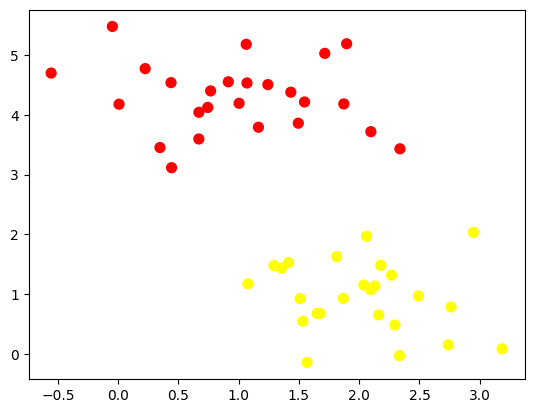

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

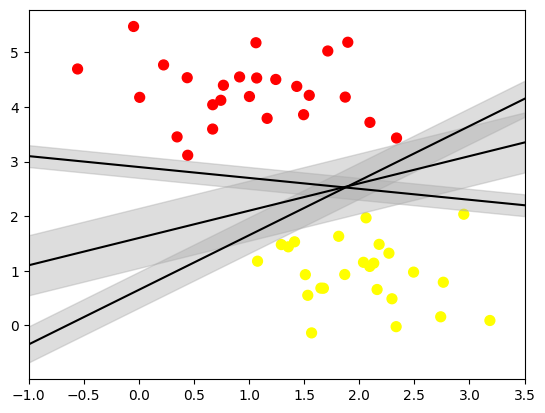

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

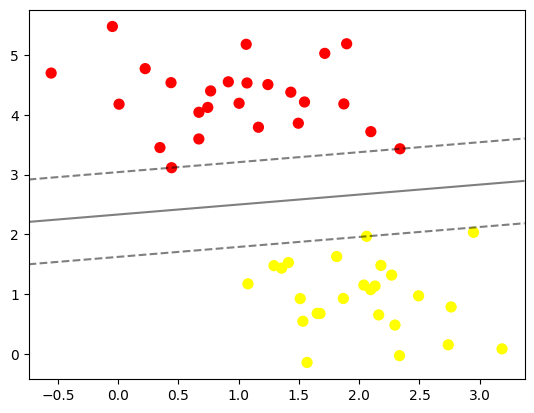

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

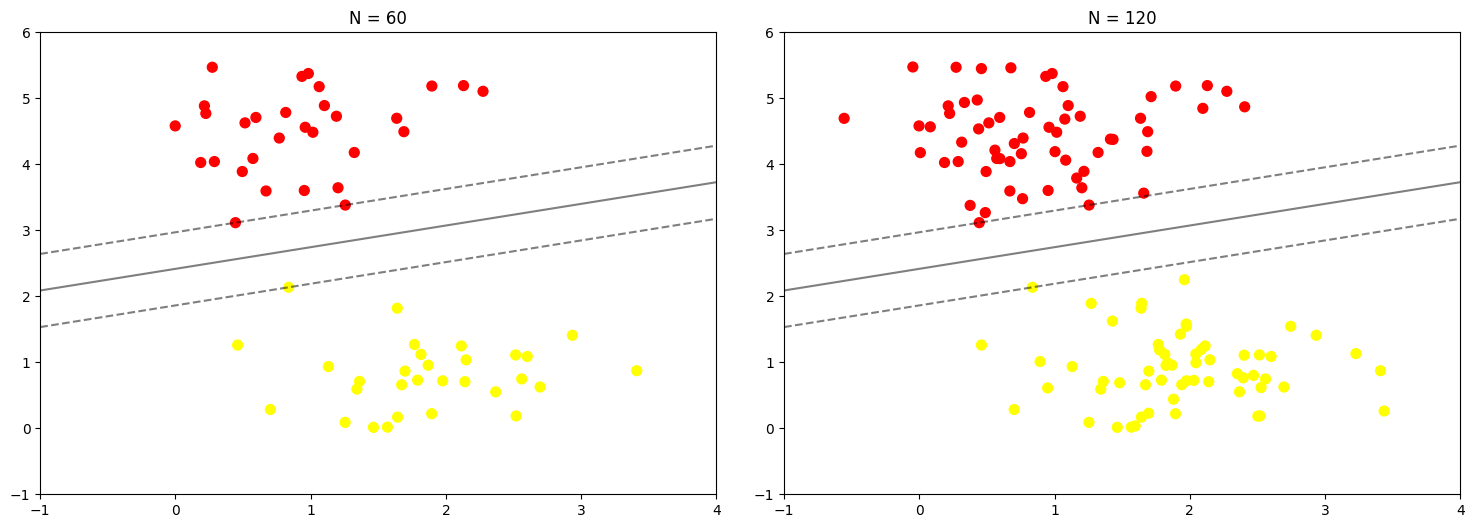

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

## Praktikum 2

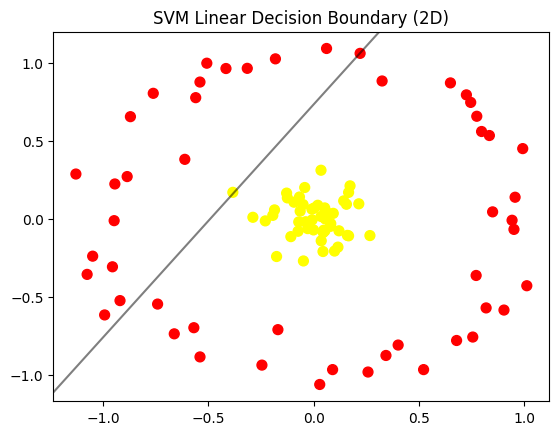

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 5.33697345e-02, -7.48891736e-02],
       [ 8.34948172e-01,  5.35217204e-01],
       [ 3.59222660e-02, -1.39230703e-01],
       [-5.07659887e-01,  9.98528826e-01],
       [ 2.20754212e-01,  1.06158570e+00],
       [ 3.50037356e-02,  1.67064555e-02],
       [-6.62368681e-01, -7.35344969e-01],
       [-1.76175089e-01, -2.39999559e-01],
       [ 9.04281087e-01, -5.83032986e-01],
       [-9.20155571e-01, -5.22440606e-01],
       [-4.16685213e-01,  9.64474082e-01],
       [ 1.55713072e-01,  9.48058258e-02],
       [ 5.25186984e-02,  7.13322787e-02],
       [-4.86226860e-02, -2.68425112e-01],
       [-1.85950729e-01,  5.86487974e-02],
       [ 8.50289296e-01,  4.60874549e-02],
       [-1.05008553e+00, -2.37794976e-01],
       [ 7.46248122e-01,  7.47406044e-01],
       [ 1.72858198e-01,  2.12813045e-01],
       [-1.94150895e-01,  2.37548643e-02],
       [-6.12227933e-01,  3.82619402e-01],
       [-1.07639601e+00, -3.54508031e-01],
       [-1.24952071e-01,  1.35665918e-01],
       [ 9.92190507e-02, -2.05001689e-01],
       [ 1.94876162e-02,  8.83382089e-02],
       [ 8.99859680e-02, -9.64518464e-01],
       [ 7.72005940e-01, -3.61419949e-01],
       [ 9.30936544e-02,  3.66630240e-02],
       [ 3.43521718e-01, -8.73918348e-01],
       [ 6.60607430e-02,  3.83432146e-02],
       [ 6.79181159e-01, -7.78018725e-01],
       [-1.28528571e-01,  1.66242760e-01],
       [ 3.23070332e-03,  7.11762820e-02],
       [-3.15452199e-01,  9.65588031e-01],
       [ 7.56007311e-01, -7.55926413e-01],
       [-6.41017342e-02,  5.06979327e-02],
       [-9.93184469e-01, -6.14278144e-01],
       [ 8.13234694e-02, -2.91285485e-02],
       [-2.82991886e-02, -6.12231745e-02],
       [-9.44673518e-01,  2.24844689e-01],
       [ 3.25205603e-01,  8.84599259e-01],
       [-8.70665489e-01,  6.55964269e-01],
       [ 1.15364115e-01, -1.79828470e-01],
       [-2.45848185e-01, -9.35693561e-01],
       [-3.84050653e-01,  1.71267610e-01],
       [ 9.93390919e-01,  4.51352860e-01],
       [ 7.97889476e-01,  5.60966807e-01],
       [-7.08259415e-02, -1.83627604e-02],
       [-8.32145980e-03,  6.34905425e-02],
       [-5.40236936e-01,  8.77794761e-01],
       [-9.32972943e-02,  1.08030574e-01],
       [ 7.75096381e-01,  6.58577254e-01],
       [ 8.03970195e-02, -4.65009471e-02],
       [-9.56052556e-01, -3.05870863e-01],
       [-5.02456173e-02,  9.25894005e-02],
       [ 5.50661401e-02,  1.02948652e-03],
       [ 2.14527098e-01,  9.76495003e-02],
       [-2.88788139e-01,  1.13408954e-02],
       [ 5.22354954e-01, -9.64522543e-01],
       [ 1.42730804e-01,  1.16498512e-01],
       [ 2.67350313e-01, -1.05757376e-01],
       [-7.62167608e-01,  8.05596509e-01],
       [-6.92777363e-04, -6.96451430e-02],
       [ 1.65890114e-01, -1.07454784e-01],
       [-2.29807674e-01, -1.17122595e-02],
       [ 1.20260107e-01, -7.52805004e-02],
       [ 9.42741622e-01, -7.72900097e-03],
       [ 9.57149289e-01,  1.39849683e-01],
       [ 1.01277292e+00, -4.27151642e-01],
       [-6.74432185e-02,  1.41263957e-01],
       [-7.33526423e-03, -5.32361366e-03],
       [ 8.19441661e-01, -5.69273282e-01],
       [-5.40094261e-01, -8.83228828e-01],
       [-7.41574067e-02, -7.81398834e-02],
       [-2.81814116e-02, -2.92707171e-02],
       [ 1.60288238e-01, -1.04659661e-01],
       [-1.81661324e-01,  1.02640957e+00],
       [ 2.58272467e-01, -9.80017703e-01],
       [ 9.51723159e-01, -6.62111083e-02],
       [-3.81819689e-02, -1.73495873e-02],
       [ 3.48781881e-02,  3.12827359e-01],
       [-4.24191772e-02,  2.02112081e-01],
       [-1.69878347e-01, -7.08520601e-01],
       [-7.41526789e-01, -5.44637126e-01],
       [-1.08392201e-01, -1.12665749e-01],
       [-5.60431439e-01,  7.77755526e-01],
       [ 4.80479032e-02, -7.94421406e-02],
       [ 4.75683428e-02, -7.16220947e-02],
       [ 7.25726858e-01,  7.95699402e-01],
       [ 6.49948487e-01,  8.72332133e-01],
       [ 2.88700207e-02, -1.05980884e+00],
       [ 1.66029968e-01,  1.70842317e-01

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# --- 1. Buat data make_circles ---
X, y = make_circles(100, factor=0.1, noise=0.1)

# --- 2. Definisikan dan fit model SVM ---
clf = SVC(kernel='linear').fit(X, y)

# --- 3. Fungsi untuk menampilkan decision boundary (2D) ---
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# --- 4. Plot data dan decision boundary (2D) ---
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)
plt.title("SVM Linear Decision Boundary (2D)")
plt.show()

# --- 5. Plot dalam bentuk 3D (dengan r didefinisikan) ---
def plot_3D(elev=30, azim=30, X=X, y=y):
    r = X[:, 0]**2 + X[:, 1]**2  # definisi r (fitur tambahan)
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('X₁')
    ax.set_ylabel('X₂')
    ax.set_zlabel('r (X₁² + X₂²)')
    plt.show()

interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))


In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

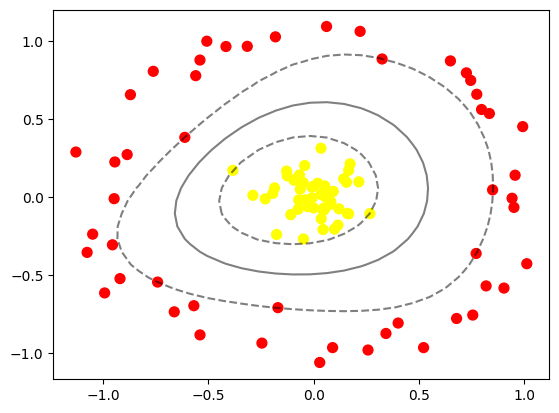

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Praktikum 3

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

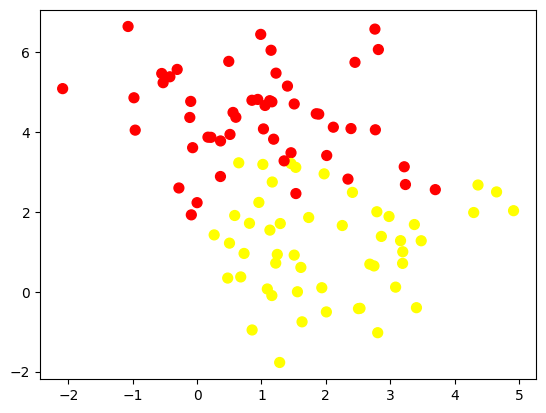

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

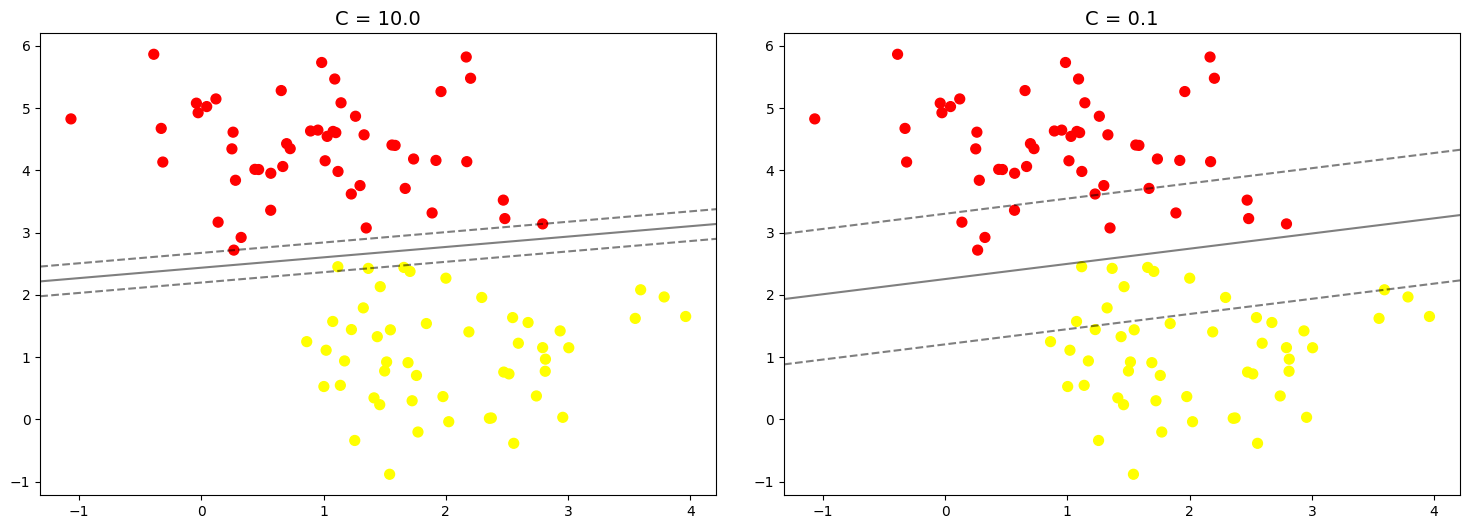

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Praktikum 4

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

KeyboardInterrupt: 

# Tugas

In [ ]:
import pandas as pd
df = pd.read_csv("/content/voice.csv")

In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

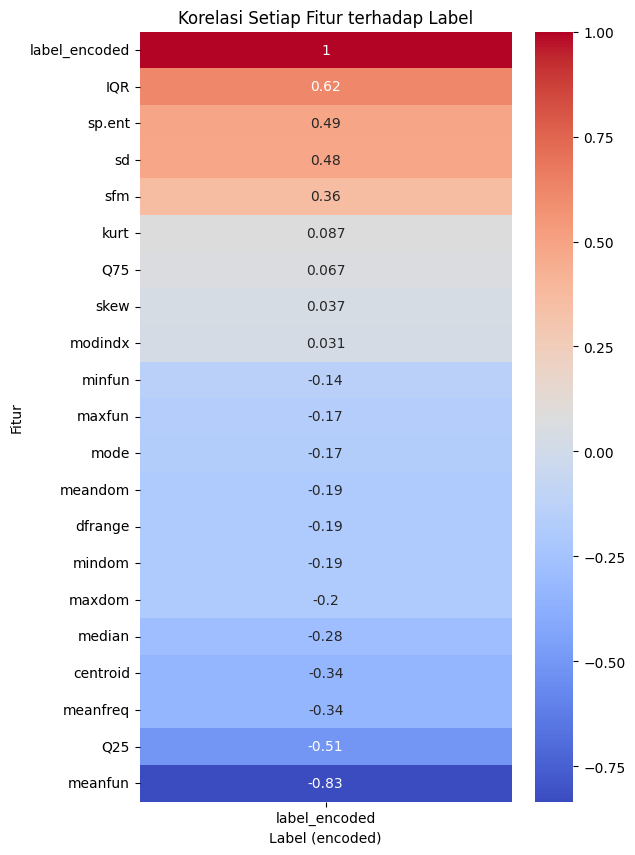

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load dataset ===
# Pastikan file voice.csv sudah diupload ke Colab (klik ikon folder di kiri -> upload)
df = pd.read_csv("voice.csv")

# === 2. Encode kolom label jika berupa teks ===
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label_encoded'] = encoder.fit_transform(df['label'])

# === 3. Buat korelasi antara semua fitur dan kolom label_encoded ===
corr = df.corr(numeric_only=True)[['label_encoded']].sort_values(by='label_encoded', ascending=False)

# === 4. Tampilkan heatmap dengan sumbu X = label_encoded dan Y = semua fitur ===
plt.figure(figsize=(6, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.title("Korelasi Setiap Fitur terhadap Label")
plt.xlabel("Label (encoded)")
plt.ylabel("Fitur")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['label_encoded'] = encoder.fit_transform(df['label'])


In [ ]:
X = df.drop(['label', 'label_encoded'], axis=1)  # fitur selain label
y = df['label_encoded']                          # target hasil encode
X = X.values
y = y.values


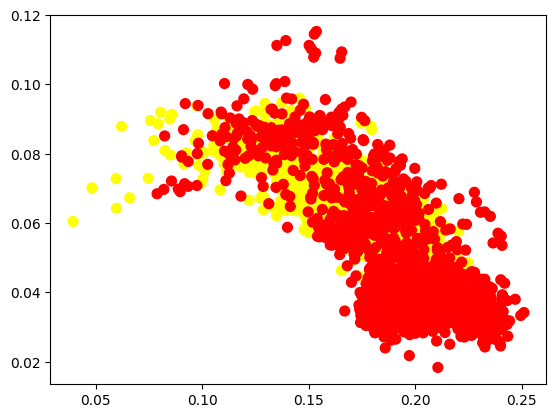

In [ ]:

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
from sklearn.model_selection import train_test_split

# Split 70% training dan 30% testing
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Split 80% training dan 20% testing
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=42
)


NameError: name 'X' is not defined

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_70 = SVC(kernel='linear', C=1E10)
model_70.fit(X_train_70, y_train_70)


In [ ]:
model_80 = SVC(kernel='linear', C=1E10)
model_80.fit(X_train_80, y_train_80)


In [ ]:
# 1️⃣ Import library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 2️⃣ Load dataset
df = pd.read_csv("voice.csv")

# 3️⃣ Encode label
encoder = LabelEncoder()
df['label_encoded'] = encoder.fit_transform(df['label'])

# 4️⃣ Pisahkan fitur (X) dan target (y)
X = df.drop(['label', 'label_encoded'], axis=1).values
y = df['label_encoded'].values

# 5️⃣ Split data menjadi 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 6️⃣ Split data menjadi 80:20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7️⃣ Buat dan latih model dengan kernel linear
model_70 = SVC(kernel='linear', C=1E10)
model_70.fit(X_train_70, y_train_70)

model_80 = SVC(kernel='linear', C=1E10)
model_80.fit(X_train_80, y_train_80)

# 8️⃣ Uji akurasi
acc_70 = model_70.score(X_test_30, y_test_30)
acc_80 = model_80.score(X_test_20, y_test_20)

print("Akurasi model (70:30) =", acc_70)
print("Akurasi model (80:20) =", acc_80)
